In [20]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pickle

plt.rcParams['text.usetex'] = True
# plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'figure.facecolor': 'white'})
plt.rcParams.update({'savefig.facecolor': 'white'})
plt.rcParams.update({'lines.linewidth': 2.0})
# plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


### WARNING: small_ap = False causes many divergent values (theta > 10^50) or NaNs

N = 16
cases=['FC500','W005_C500_NO_COR']
case = cases[0] 

output={}

with open('outputs/samples_FC500_'+str(N), 'rb') as handle:
    # with open('outputs/sobol_'+nsample, 'rb') as handle:
    output = pickle.load(handle)

saving_name = 'sobol_'+cases[0]+'_'+str(N)
print(saving_name)


sobol_FC500_16


In [31]:
len(output['variables_range'])
output['FC500']['coordinates']['time']['FC500'].shape
# output['FC500']['variables']['temp']['Y'].shape


(72,)

In [4]:
for i in range(len(output['16']['variables_range'])):
    print(output['16']['variables_range'][i][0],output['16']['FC500']['Cent']['X_tilde'][4][i])

KeyError: 'Cent'

In [7]:
output['16']['FC500']['coordinates']

{'z_r': array([-975.66153917, -929.15900755, -885.40320557, -844.22127555,
        -805.45123825, -768.94130825, -734.54925247, -702.14178898,
        -671.59402371, -642.78892259, -615.61681689, -589.97493971,
        -565.76699165, -542.9027338 , -521.29760634, -500.87237112,
        -481.55277683, -463.26924512, -445.95657654, -429.55367499,
        -414.00328949, -399.25177219, -385.24885169, -371.94742047,
        -359.30333589, -347.27523355, -335.82435251, -324.91437144,
        -314.51125511, -304.58311056, -295.10005229, -286.03407595,
        -277.35893998, -269.0500547 , -261.08437839, -253.4403199 ,
        -246.09764738, -239.03740281, -232.24182181, -225.69425864,
        -219.37911577, -213.28177801, -207.38855072, -201.68660192,
        -196.16390807, -190.80920326, -185.61193157, -180.56220247,
        -175.65074903, -170.86888873, -166.20848678, -161.66192171,
        -157.22205321, -152.88219191, -148.63607111, -144.47782032,
        -140.40194043, -136.40328045, -13

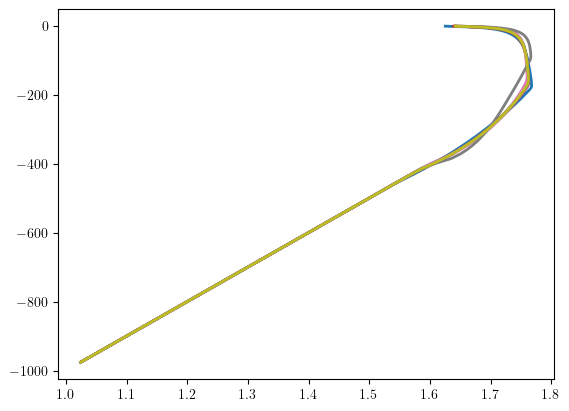

In [17]:
z_r = output['16']['FC500']['coordinates']['z_r']

for parameter in output['16']['FC500']['variables']['temp']['Y_tilde']:
    plt.plot(output['16']['FC500']['variables']['temp']['Y_tilde'][parameter][0][:,-1], z_r)

In [ ]:

saving_path = 'figures/sensitivity_of_variance_'+case+'.png'

true_name={'Cent': r'$\beta_1$',
            'Cdet': r'$\beta_2$',
            'wp_a': r'$a$',
            'wp_b': r'$b$',
            'wp_bp': r'$b^\prime$',
            'up_c': r'$C_u$',
            'vp_c': r'$C_v$',
            'bc_ap': r'$a_p^0$',
            'delta_bkg': r'$\delta_0$',
            'wp0': r'$w_p^0$' }

#=============== Plot only THETA =====================

alphas = np.linspace(start=0.3,stop=1,num=len(nsamples))

# fig, axs = plt.subplots(nrows=3, ncols=4, sharex=False, constrained_layout=True)

fig=plt.figure()
ax11 = plt.subplot(3,4,1)
ax12 = plt.subplot(3,4,2)
ax13 = plt.subplot(3,4,3)
ax14 = plt.subplot(3,4,4)
ax21 = plt.subplot(3,4,5)
ax22 = plt.subplot(3,4,6)
ax23 = plt.subplot(3,4,7)
ax24 = plt.subplot(3,4,8)
ax31 = plt.subplot(3,4,9)
ax32 = plt.subplot(3,4,10)
ax5  = plt.subplot(3,2,6)
axs=[ax11,ax12,ax13,ax14,ax21,ax22,ax23,ax24,ax31,ax32,ax5]


field = 'temp' 
xmin = -0.0001
xmax = 0.0005
zlim=-300
#====================================
for k,nsample in enumerate(nsamples):
    z_r = output[nsample][case]['z_r']
    for i, parameter in enumerate(output[nsample][case]['sobol_indices']):
        variable_name = true_name[parameter]
        axs[i].plot(output[nsample][case]['sobol_indices'][parameter][field]['enumerator_z'], z_r, color='tab:blue',alpha=alphas[k])
        axs[i].set_ylabel(r'$z(m)$')
        axs[i].set_xlabel(r'$K^2$')
        axs[i].set_title(r'$\mathbf{Var}(\mathbf{E}[\theta |$'+variable_name+' $])$')
        # axs[i].set_xlim((xmin,xmax))
        # axs[i].set_ylim((zlim,0))


ax=axs[-1]
for k,nsample in enumerate(nsamples):
    for parameter in output[nsample][case]['sobol_indices']:
        variable_name = true_name[parameter]
        L2sobolindex=output[nsample][case]['sobol_indices'][parameter][field]['l2 index']
        ax.plot(variable_name, L2sobolindex, 'o', color='tab:blue',  alpha=alphas[k])
    ax.set_title(r'$L^2$ relative variance')
    # ax.set_ylim((0,0.5))
fig.tight_layout()




